In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
band_paths = [
    '/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L2SP_129054_20250429_20250501_02_T1/LC09_L2SP_129054_20250429_20250501_02_T1_SR_B1.TIF',
    '/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L2SP_129054_20250429_20250501_02_T1/LC09_L2SP_129054_20250429_20250501_02_T1_SR_B2.TIF',
    '/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L2SP_129054_20250429_20250501_02_T1/LC09_L2SP_129054_20250429_20250501_02_T1_SR_B3.TIF',
    '/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L2SP_129054_20250429_20250501_02_T1/LC09_L2SP_129054_20250429_20250501_02_T1_SR_B4.TIF',
    '/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L2SP_129054_20250429_20250501_02_T1/LC09_L2SP_129054_20250429_20250501_02_T1_SR_B5.TIF', 
    '/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L2SP_129054_20250429_20250501_02_T1/LC09_L2SP_129054_20250429_20250501_02_T1_SR_B6.TIF',
    '/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L2SP_129054_20250429_20250501_02_T1/LC09_L2SP_129054_20250429_20250501_02_T1_SR_B7.TIF',
]

In [3]:
mult_ref_list = [2.0000E-05, 2.0000E-05, 2.0000E-05, 2.0000E-05, 2.0000E-05, 2.0000E-05, 2.0000E-05]
add_ref_list = [-0.100000, -0.100000, -0.100000, -0.100000, -0.100000, -0.100000, -0.100000]
angle_degrees = 64.75739839 # A single value for the scene

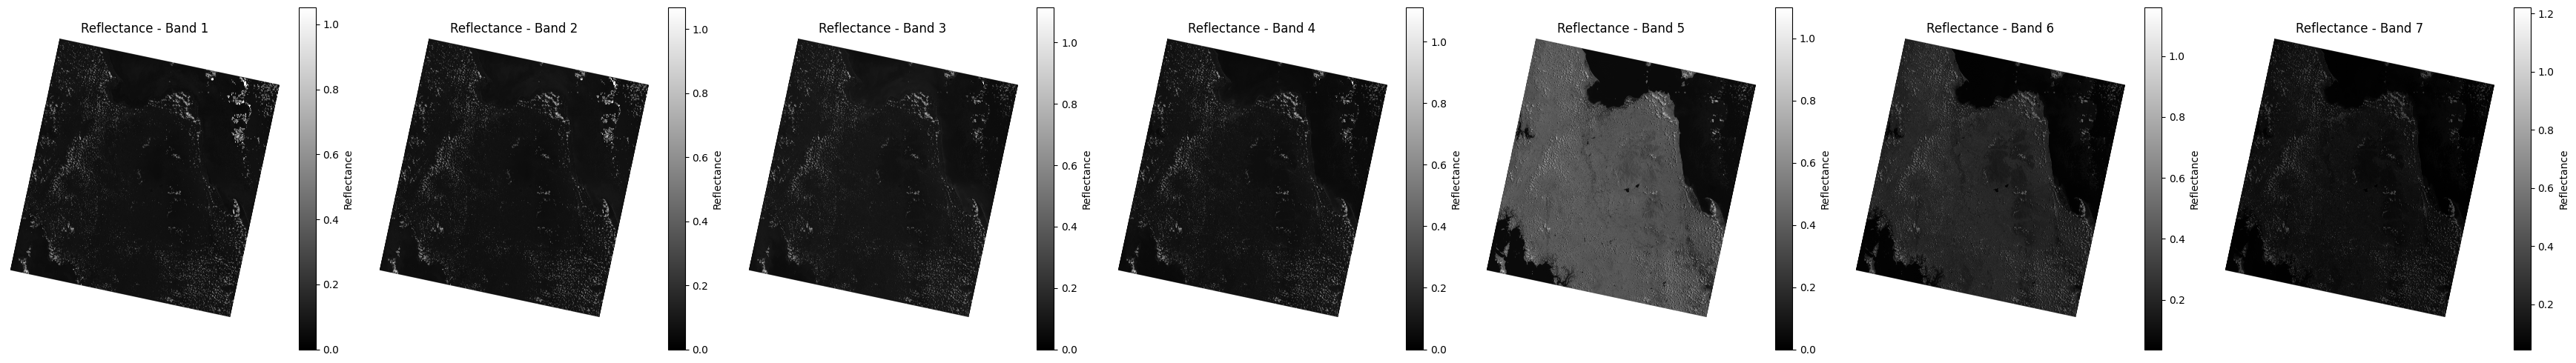

In [4]:
# Convert solar elevation angle to radians
angle_rad = np.deg2rad(angle_degrees)

# Create subplots for visualization
fig, axes = plt.subplots(1, 7, figsize=(35, 5))

reflectance_data = {}

for i, band_path in enumerate(band_paths):
    with rasterio.open(band_path) as src:
        dn_image = src.read(1).astype(float)
        no_data_value = src.nodata
        if no_data_value is not None:
            dn_image = np.ma.masked_equal(dn_image, no_data_value)
    
    # Calculate reflectance using the provided formula
    mult_ref = mult_ref_list[i]
    add_ref = add_ref_list[i]
    ref_image = (mult_ref * dn_image + add_ref) / np.sin(angle_rad)
    ref_image[ref_image < 0] = np.nan
    
    reflectance_data[f"Band {i+1}"] = ref_image
    
    # Plot the reflectance image
    img = axes[i].imshow(ref_image, cmap='gray')
    axes[i].set_title(f'Reflectance - Band {i+1}')
    axes[i].axis('off')
    fig.colorbar(img, ax=axes[i], label='Reflectance')

plt.tight_layout()
plt.show()